<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/CNN_In_Tensorflow_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# 60000 images, each image of shape 28x28 ( black and white ), y_train contains label for each image
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


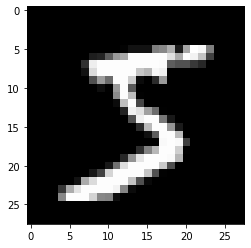

In [4]:
# Now let’s take a look at one of the images in our dataset to see what we are working with.
#  We will plot the first image in our dataset

import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0], cmap = 'gray')

In [5]:
'''
    Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. 
    The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). 
    The last number is 1, which signifies that the images are greyscale.
'''

'\n    Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. \n    The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). \n    The last number is 1, which signifies that the images are greyscale.\n'

In [6]:
#reshape data to fit model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
# Now We need to one-hot-encode our target variable. 
from tensorflow.keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0] # should return hot for 5th index and 0 for others

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
# strides (1, 1) means 1 step in x-direction and 1 step in y-direction
# by default padding='valid' means no padding, if padding = 'same', then it results in same output shape
model.add(Conv2D(64, strides = (1, 1), kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
# output shape: ( (input_width - kernel_width + 2*padding) / stride ) + 1
# same for height

# For first conv layer: width: ((28 - 3 + 0) / 1) + 1 -> 26, height:  width: ((28 - 3 + 0) / 1) + 1 -> 26

# Now calculating number of parameters in for first conv layer: we have 64 kernels each of shape (3, 3)
# i.e for each kerenl we have 9 weights, therefore for 64 kernels we have 64*9 = 576 weights
#  Also we have 64 biases, therefore total params in first conv layer = 576 + 64 = 640
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
#compile model using accuracy to measure model performance
# Checkout the keras_examples folder for more metrics and losses
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.6552 - accuracy: 0.9155 - val_loss: 0.0712 - val_accuracy: 0.9778
Epoch 2/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0714 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0875 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.1050 - val_accuracy: 0.9779


In [13]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[5.12997873e-11, 1.87311824e-17, 5.92942673e-09, 5.84726090e-09,
        6.80671468e-19, 3.91730268e-13, 4.14018346e-19, 1.00000000e+00,
        1.21021491e-11, 5.68524228e-10],
       [4.57671715e-13, 1.85170224e-09, 1.00000000e+00, 4.44451886e-17,
        1.60776779e-21, 1.35836658e-21, 8.55839177e-10, 4.08257228e-22,
        1.43869410e-14, 7.48035220e-22],
       [6.14124529e-09, 9.99983907e-01, 1.16966658e-05, 1.56229261e-12,
        1.46271009e-06, 2.62014077e-10, 2.46988918e-09, 1.48744277e-06,
        1.54729480e-06, 3.98299145e-12],
       [1.00000000e+00, 1.18045264e-14, 9.74849715e-11, 7.32475495e-13,
        6.97803344e-17, 3.30704051e-13, 2.89965616e-08, 1.13978922e-13,
        4.95961466e-11, 3.88042723e-12]], dtype=float32)

In [15]:
# now taking the argmax out of predictions
tf.argmax( model.predict(X_test[:4]), axis = 1 )

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([7, 2, 1, 0])>

In [17]:
tf.argmax( y_test[:4], axis = 1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([7, 2, 1, 0])>

In [ ]:
# YaY!! we got the correct predictions